<a href="https://colab.research.google.com/github/ManukyanErik/Kaggle/blob/main/Tabular%20data/Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection, tree, svm, ensemble, neighbors, linear_model, metrics, preprocessing


from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer, f1_score

In [2]:
!unzip "/content/drive/MyDrive/Colab Notebooks/2.Projects/Churn in Telecom's/archive.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/2.Projects/Churn in Telecom's/archive.zip
  inflating: Telecom.csv             


In [3]:
df = pd.read_csv('/content/Telecom.csv')

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


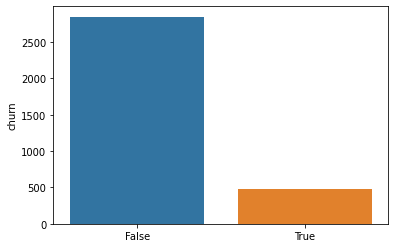

In [4]:
sns.barplot(x=df["churn"].unique(), y = df["churn"].value_counts())

In [5]:
print("Churn Percentage = "+str( (df["churn"][df["churn"] == True].shape[0] / df["churn"].shape[0]) * 100 ))

Churn Percentage = 14.491449144914492


In [6]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Churn By State

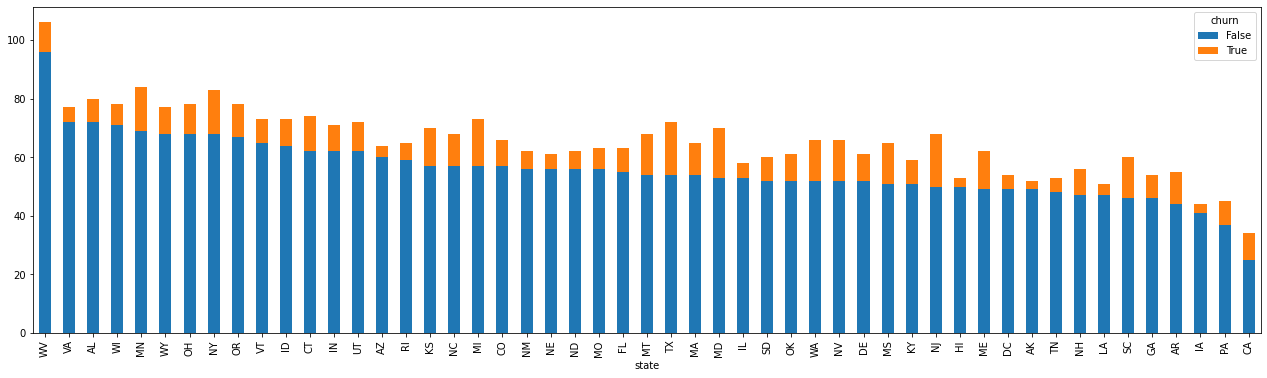

In [7]:
df.groupby(["state", "churn"]).size().unstack(). \
                              sort_values(by=[False], ascending=False). \
                              plot(kind='bar', stacked=True, figsize=(22,6)) 

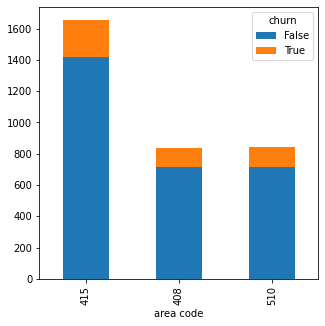

In [8]:
df.groupby(["area code", "churn"]).size().unstack(). \
                                  sort_values(by=[False], ascending=False). \
                                  plot(kind='bar', stacked=True, figsize=(5,5)) 

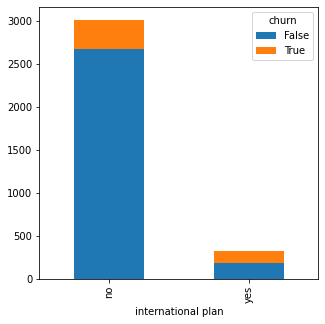

In [9]:
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

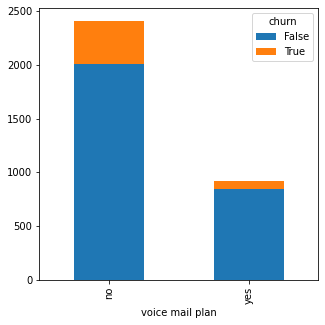

In [10]:
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

## Handle Categorical Cols - Label Encode

In [11]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()

In [12]:
# State is string and we want discreet integer values
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

#print(df['Voice mail plan'][:4])
print(df.dtypes)

state                       int64
account length              int64
area code                   int64
phone number               object
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [13]:
df.shape

(3333, 21)

In [14]:
df.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [15]:
X = df.drop(["phone number","churn"], axis = 1)

In [16]:
y = df["churn"]

## Standardize Feature Matrix values

In [17]:
X.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [18]:
scaler = preprocessing.StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [19]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Models


## Gradient Boosting Classifier

In [20]:
clf = ensemble.GradientBoostingClassifier().fit(X_train, y_train)

clf.score(X_test, y_test)

0.9505247376311844

In [21]:
f1_score(y_test, clf.predict(X_test))

0.8176795580110497

## Support vector machine(SVM)

In [22]:
clf = svm.SVC().fit(X_train, y_train)

clf.score(X_test, y_test)

0.9280359820089955

In [23]:
f1_score(y_test, clf.predict(X_test))

0.7073170731707316

## Random Forest Classifier

In [24]:
clf = ensemble.RandomForestClassifier().fit(X_train, y_train)

clf.score(X_test, y_test)

0.9490254872563718

In [25]:
f1_score(clf.predict(X_test), y_test)

0.8111111111111111

## K Nearest Neighbor Classifier

In [26]:
clf = neighbors.KNeighborsClassifier().fit(X_train, y_train)

clf.score(X_test, y_test)

0.889055472263868

In [27]:
f1_score(y_test, clf.predict(X_test))

0.4714285714285715

## Logistic Regression

In [28]:
clf = linear_model.LogisticRegression().fit(X_train, y_train)

clf.score(X_test, y_test)

0.856071964017991

In [29]:
f1_score(y_test, clf.predict(X_test))

0.26153846153846155

#Parameter Tuning 

In [30]:
rfc= ensemble.RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [7, 8, 9, 10, 11, 12, 14, 16],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 9, 10, 11, 12, 14, 16],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500, 600]})

In [31]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'auto',
 'n_estimators': 100}

# Predict


In [32]:
clf = ensemble.RandomForestClassifier(criterion='entropy', max_depth=11, max_features='auto', n_estimators=400).fit(X_train, y_train)

clf.score(X_test, y_test)

0.9445277361319341

In [33]:
f1_score(clf.predict(X_test), y_test)

0.7885714285714286